In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve

In [41]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# get_clf_eval() 평가지표 확인

In [43]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:', accuracy, '정밀도:',precision, '재현율:',recall, 'F1:',f1, 'ROC_AUC:',roc_auc)

# precision_recall_curve_plot () 시각화

In [44]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

# model 생성 및 학습

## 데이터 분할

In [51]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1] # outcome 칼럼으로 레이블 값

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156, stratify=y)

## 모델 생성

In [52]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727272727272727 정밀도: 0.7111111111111111 재현율: 0.5925925925925926 F1: 0.6464646464646465 ROC_AUC: 0.8083333333333333


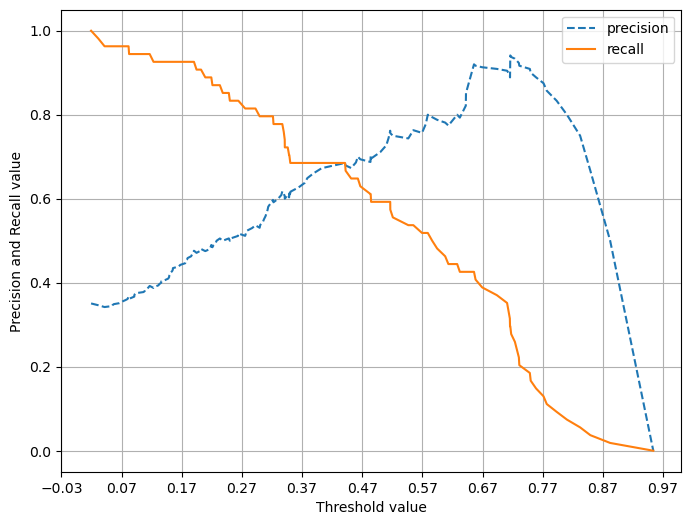

In [53]:
precision_recall_curve_plot(y_test, pred_proba)

In [54]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
# zero 값 처리

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

mean_df = diabetes_df[zero_features].mean()
diabetes_df[zero_features] = diabetes_df[zero_features].replace(0, mean_df)

# 스케일링 Scaling

In [57]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1] # outcome 칼럼으로 레이블 값

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=156, stratify=y)

In [58]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987012987012987 정밀도: 0.7674418604651163 재현율: 0.6111111111111112 F1: 0.6804123711340206 ROC_AUC: 0.8433333333333334


In [60]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.45, 0.48, 0.50]

pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[65 35]
 [11 43]]
정확도: 0.7012987012987013 정밀도: 0.5512820512820513 재현율: 0.7962962962962963 F1: 0.6515151515151515 ROC_AUC: 0.8433333333333334
임곗값: 0.33
오차 행렬
[[71 29]
 [11 43]]
정확도: 0.7402597402597403 정밀도: 0.5972222222222222 재현율: 0.7962962962962963 F1: 0.6825396825396826 ROC_AUC: 0.8433333333333334
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7467532467532467 정밀도: 0.6190476190476191 재현율: 0.7222222222222222 F1: 0.6666666666666666 ROC_AUC: 0.8433333333333334
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532467532467533 정밀도: 0.6333333333333333 재현율: 0.7037037037037037 F1: 0.6666666666666666 ROC_AUC: 0.8433333333333334
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857142857142857 정밀도: 0.7058823529411765 재현율: 0.6666666666666666 F1: 0.6857142857142857 ROC_AUC: 0.8433333333333334
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987012987012987 정밀도: 0.7446808510638298 재현율: 0.6481481481481481 F1: 0.693069306930693 ROC_AUC: 0.8433333333333334
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987012987012